# Train Smaller Data

In [1]:
import numpy as np
smaller_train_x = np.load("data/smaller_train_x.npy")
smaller_test_x = np.load("data/smaller_test_x.npy")
smaller_train_y = np.load("data/smaller_train_y.npy")
smaller_test_y = np.load("data/smaller_test_y.npy")

In [2]:
import tensorflow as tf
train_batch_size = 100
n_input = 101 * 101 * 60
features = [tf.contrib.layers.real_valued_column("x", dimension= n_input)]
train_input_fn = tf.contrib.learn.io.numpy_input_fn({"x": smaller_train_x}, smaller_train_y, train_batch_size, num_epochs = 1000)
test_input_fn = tf.contrib.learn.io.numpy_input_fn({"x":smaller_test_x}, smaller_test_y, batch_size=200, num_epochs=20)

linear_model_samller = tf.contrib.learn.LinearRegressor(
    feature_columns = features,
    model_dir="my_model/linear_model_smaller",
    config= tf.contrib.learn.RunConfig(
        keep_checkpoint_max = 50,
        gpu_memory_fraction=0.6))

INFO:tensorflow:Using config: {'_evaluation_master': '', '_save_checkpoints_secs': 600, '_task_id': 0, '_save_summary_steps': 100, '_environment': 'local', '_is_chief': True, '_task_type': None, '_master': '', '_tf_random_seed': None, '_keep_checkpoint_max': 50, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023771184198>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 0.6
}
, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_save_checkpoints_steps': None}


In [ ]:
for i in range(0,20):
    linear_model_samller.fit(input_fn = train_input_fn, steps = 1000)
    linear_model_samller.evaluate(input_fn=test_input_fn, steps=10)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 3002 into my_model/linear_model_smaller\model.ckpt.
INFO:tensorflow:loss = 15.42, step = 3002
INFO:tensorflow:global_step/sec: 6.18041
INFO:tensorflow:loss = 15.5716, step = 3102
INFO:tensorflow:global_step/sec: 6.59178
INFO:tensorflow:loss = 6.03353, step = 3202
INFO:tensorflow:global_step/sec: 5.76846
INFO:tensorflow:loss = 12.8386, step = 3302
INFO:tensorflow:global_step/sec: 5.83893
INFO:tensorflow:loss = 11.0085, step = 3402
INFO:tensorflow:global_step/sec: 6.52
INFO:tensorflow:loss = 12.485, step = 3502


In [ ]:
del smaller_train_x
del smaller_train_y
del samller_test_x
del smaller_test_y

# Train Larger Data

In [ ]:
import numpy as np
larger_train_x = np.load("data/larger_train_x.npy")
larger_test_x = np.load("data/larger_test_x.npy")
larger_train_y = np.load("data/larger_train_y.npy")
larger_test_y = np.load("data/larger_test_y.npy")

In [ ]:
import tensorflow as tf
train_batch_size = 100
n_input = 101 * 101 * 60
features = [tf.contrib.layers.real_valued_column("x", dimension= n_input)]
train_input_fn = tf.contrib.learn.io.numpy_input_fn({"x": larger_train_x}, larger_train_y, train_batch_size, num_epochs = 1000)
test_input_fn = tf.contrib.learn.io.numpy_input_fn({"x":larger_test_x}, larger_test_y, batch_size=200, num_epochs=20)

linear_model_larger = tf.contrib.learn.LinearRegressor(
    feature_columns = features,
    model_dir="my_model/linear_model_larger",
    config= tf.contrib.learn.RunConfig(
        keep_checkpoint_max = 50,
        gpu_memory_fraction=0.6))

In [ ]:
for i in range(0,20):
    linear_model_larger.fit(input_fn = train_input_fn, steps = 1000)
    linear_model_larger.evaluate(input_fn=test_input_fn, steps=10)

In [ ]:
del larger_train_x
del larger_train_y
del larger_test_x
del larger_test_y 

# Test Two Regression With Label [Test Data]

In [1]:
import numpy as np
test_x = np.load("test_x.npy")
label_test_y = np.load("data/label_test_y.npy")
test_y = np.load("test_y.npy")

In [2]:
import tensorflow as tf
n_input = 101 * 101 * 60
features = [tf.contrib.layers.real_valued_column("x", dimension= n_input)]

linear_model_samller = tf.contrib.learn.LinearRegressor(
    feature_columns = features,
    model_dir="my_model/linear_model_smaller",
    config= tf.contrib.learn.RunConfig(
        keep_checkpoint_max = 50,
        gpu_memory_fraction=0.6))

linear_model_larger = tf.contrib.learn.LinearRegressor(
    feature_columns = features,
    model_dir="my_model/linear_model_larger",
    config= tf.contrib.learn.RunConfig(
        keep_checkpoint_max = 50,
        gpu_memory_fraction=0.6))

INFO:tensorflow:Using config: {'_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_environment': 'local', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 50, '_master': '', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2524EAE10>, '_keep_checkpoint_every_n_hours': 10000, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 0.6
}
, '_task_type': None, '_task_id': 0}
INFO:tensorflow:Using config: {'_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_environment': 'local', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 50, '_master': '', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2561BC438>, '_keep_checkpoint_every_n_hours': 10000, '_tf_config': gpu_options {
  per_process_gpu_

In [3]:
smaller_list = []
for i in range(20):
    temp = linear_model_samller.predict(x={"x": test_x[i * 100: (i + 1) * 100]}, as_iterable=False)
    smaller_list.append(temp)

larger_list = []
for i in range(20):
    temp = linear_model_larger.predict(x={"x": test_x[i * 100: (i + 1) * 100]}, as_iterable=False)
    larger_list.append(temp)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est =

In [4]:
smaller_list = np.asarray(smaller_list, dtype=np.float32).reshape(2000)
larger_list = np.asarray(larger_list, dtype=np.float32).reshape(2000)

In [5]:
result_list = []
for i in range(0,2000):
    if label_test_y[i] == 1.0:
        temp = larger_list[i]
    else:
        temp = smaller_list[i]
    result_list.append(temp)

result_list = np.asarray(result_list, dtype=np.float32).reshape(2000, 1)

In [6]:
result_list[0:10], test_y[0:10]

(array([[ 28.74233627],
        [  4.54018021],
        [  3.84003711],
        [  5.66004372],
        [  5.4809866 ],
        [  2.22062802],
        [ 32.67314911],
        [  2.62027097],
        [  1.81727576],
        [  1.1421504 ]], dtype=float32), array([[ 22.39999962],
        [ 22.79999924],
        [  3.70000005],
        [  1.70000005],
        [  3.5       ],
        [ 27.79999924],
        [ 20.10000038],
        [ 28.20000076],
        [  3.79999995],
        [  2.0999999 ]], dtype=float32))

In [14]:
result_list[result_list<0] = 0
np.sqrt(np.mean(np.square(result_list_zero - test_y)))

10.449875

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2CC748518>]], dtype=object)

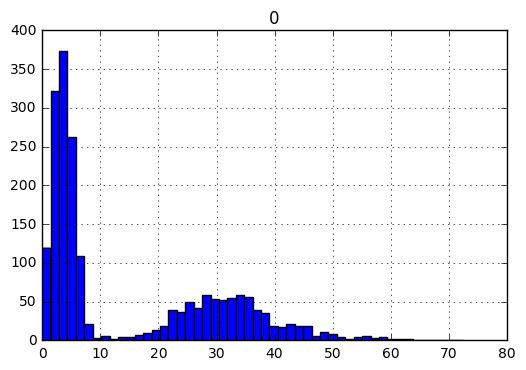

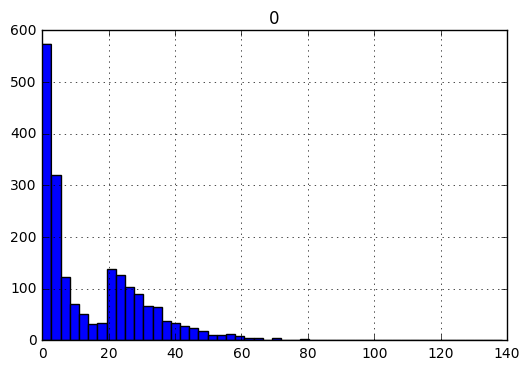

In [15]:
%matplotlib inline
import pandas as pd
pd.DataFrame(result_list).hist(bins=50)
pd.DataFrame(test_y).hist(bins=50)

# Online Data

In [1]:
import numpy as np
online_test_x = np.load("online_test_x.npy")
online_label_y = np.load("data/online_label_y.npy")

In [2]:
import tensorflow as tf
n_input = 101 * 101 * 60
features = [tf.contrib.layers.real_valued_column("x", dimension= n_input)]

linear_model_samller = tf.contrib.learn.LinearRegressor(
    feature_columns = features,
    model_dir="my_model/linear_model_smaller",
    config= tf.contrib.learn.RunConfig(
        keep_checkpoint_max = 50,
        gpu_memory_fraction=0.6))

linear_model_larger = tf.contrib.learn.LinearRegressor(
    feature_columns = features,
    model_dir="my_model/linear_model_larger",
    config= tf.contrib.learn.RunConfig(
        keep_checkpoint_max = 50,
        gpu_memory_fraction=0.6))

INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_master': '', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000208ED19BDA0>, '_keep_checkpoint_max': 50, '_environment': 'local', '_save_checkpoints_secs': 600, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_task_id': 0, '_task_type': None, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 0.6
}
, '_num_ps_replicas': 0}
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_master': '', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000208F0EED390>, '_keep_checkpoint_max': 50, '_environment': 'local', '_save_checkpoints_secs': 600, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_task_id': 0, '_task_type': None, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_

In [3]:
smaller_list = []
for i in range(10):
    temp = linear_model_samller.predict(x={"x": online_test_x[i * 200: (i + 1) * 200]}, as_iterable=False)
    smaller_list.append(temp)

larger_list = []
for i in range(10):
    temp = linear_model_larger.predict(x={"x": online_test_x[i * 200: (i + 1) * 200]}, as_iterable=False)
    larger_list.append(temp)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est =

In [4]:
smaller_list = np.asarray(smaller_list, dtype=np.float32).reshape(2000)
larger_list = np.asarray(larger_list, dtype=np.float32).reshape(2000)

In [5]:
result_list = []
for i in range(0,2000):
    if online_label_y[i] == 1.0:
        temp = larger_list[i]
    else:
        temp = smaller_list[i]
    result_list.append(temp)

result_list = np.asarray(result_list, dtype=np.float32).reshape(2000, 1)

In [8]:
result_list[result_list < 0]= 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020949968160>]], dtype=object)

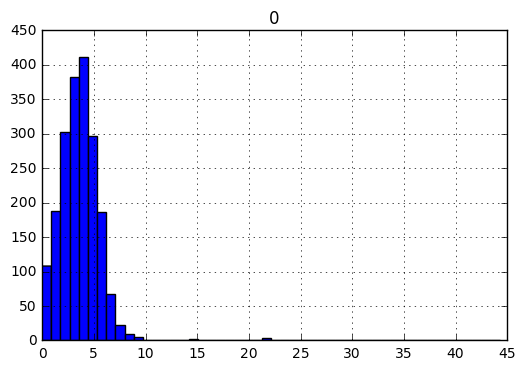

In [9]:
%matplotlib inline
import pandas as pd
pd.DataFrame(result_list).hist(bins=50)

In [13]:
result_list = result_list.reshape(2000)
with open("answer.csv", "w") as f:
    for i in range(2000):
        f.write(str(result_list[i]) + "\n")

In [33]:
label_test_y[label_test_y == 0.0].shape

(1963,)

In [34]:
np.average(result_list)

3.8047974

In [14]:
np.sqrt(np.mean(np.square(0 - result_list)))

4.5212235